## PART 1: LOAD AND PREPARE THE DATA

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime

## DATA PREPARATION

In [67]:
df_prices=pd.read_csv('Downloads/average-property-price.csv')
df_location=pd.read_csv('Downloads/location-codes.csv')
df_prices.head()

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795


In [3]:
df_region=df_prices.loc[df_prices['Code'].str.contains('E12')]
df_region
df_region = df_region.assign(Month = pd.to_datetime(
df_region['Date'], dayfirst=True)).drop(labels='Date', axis=1)
df_region.head()

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01


In [4]:
df_area=df_prices.loc[0:5435]
df_area.head()

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795


## MERGING A COLUMN TO MAKE A NEW DATAFRAME

In [5]:
df_area = df_area.merge(df_location[['AuthorityCode','RegionName']],left_on='Code',right_on='AuthorityCode')
df_area=df_area.drop(['AuthorityCode'],axis=1)
df_area

,Date,Area,Code,Detached,Semi,Terraced,Flat,RegionName
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,North East
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,North East
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,North East
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,North East
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,North East
...,...,...,...,...,...,...,...,...
5431,01/04/2019,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,West Midlands
5432,01/05/2019,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,West Midlands
5433,01/06/2019,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,West Midlands
5434,01/07/2019,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,West Midlands


In [6]:
df_area.isnull().sum()

Date           0
Area           0
Code           0
Detached      36
Semi          36
Terraced      20
Flat           0
RegionName     0
dtype: int64

In [7]:
df_area.shape

(5436, 8)

In [8]:
df_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5435
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5436 non-null   object 
 1   Area        5436 non-null   object 
 2   Code        5436 non-null   object 
 3   Detached    5400 non-null   float64
 4   Semi        5400 non-null   float64
 5   Terraced    5416 non-null   float64
 6   Flat        5436 non-null   float64
 7   RegionName  5436 non-null   object 
dtypes: float64(4), object(4)
memory usage: 382.2+ KB


## MISSING VALUE TREATMENT

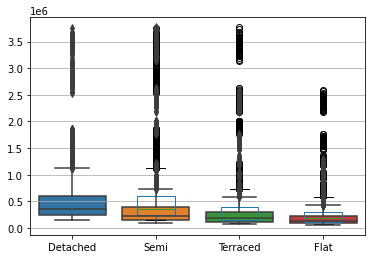

In [68]:
df_area.boxplot()
ax = sns.boxplot(data=df_area)
plt.show()

In [69]:
df_area['Detached'].fillna(df_area.Detached.median(), inplace=True)
df_area['Semi'].fillna(df_area.Semi.median(), inplace=True)
df_area['Terraced'].fillna(df_area.Terraced.median(), inplace=True)

df_area.isnull().sum()

Area          0
Code          0
Detached      0
Semi          0
Terraced      0
Flat          0
RegionName    0
Month         0
dtype: int64

Mean — When the data has no outliers. Mean is the average value and Mean will be affected by outliers.

Median — When the data has more outliers, it's best to replace them with the median value. Median is the middle value (50%)

The features have less missing values and the features have more outliers the missing values are treated with median of the each features.

## PART 2: PLOTTING THE TRENDS

<AxesSubplot:xlabel='Month', ylabel='Detached'>

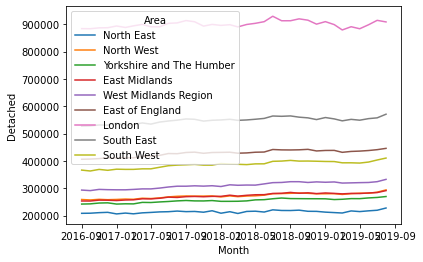

In [11]:
sns.lineplot(x='Month',y='Detached',hue='Area',data=df_region)

<AxesSubplot:xlabel='Month', ylabel='Detached'>

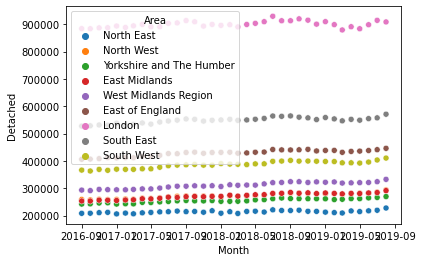

In [60]:
sns.scatterplot(x='Month',y='Detached',hue='Area',data=df_region)

<AxesSubplot:xlabel='Month', ylabel='Flat'>

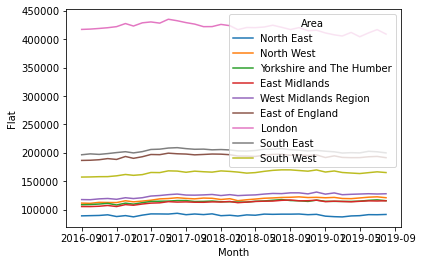

In [62]:
sns.lineplot(x='Month',y='Flat',hue='Area',data=df_region)

<AxesSubplot:xlabel='Month', ylabel='Flat'>

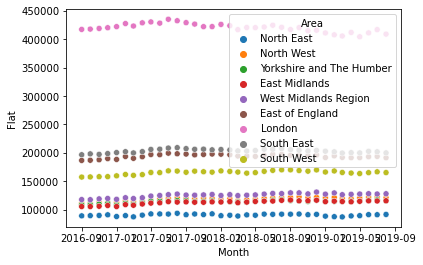

In [14]:
sns.scatterplot(x='Month',y='Flat',hue='Area',data=df_region)

The trends shown in the plot is between the 9 regions with change in Detached with Month and Flats with Month.
The trends shows that in the detached properties there is a little change with the price with respective months and the regions.
The distached property are the houses which is a villa with a lot of space inside and is prices more according to the square feet,
and with highest price in lONDON.
And the flat is a house , prices in the range between 100000 to 450000.with highest price in London.
There are changes in the prices overall in each month, in which london stands high in both the properties and 
Northeast Region prices less compared to all others.

The highest price of flats is in London and the Detached starts with the similar price in East of England.Therefore, Buying a detached property in that region is resonable.

And the prices almost overlaps for detached in North east and flats in Sount West and Sount East , And for Detached the prices ranges from 200000 to 900000 over the months.


## PART 3: PRICE CHANGES

In [15]:
df_area = df_area.assign(Month = pd.to_datetime(
df_area['Date'], dayfirst=True)).drop(labels='Date', axis=1)
df_area

,Area,Code,Detached,Semi,Terraced,Flat,RegionName,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,North East,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,North East,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,North East,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,North East,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,North East,2017-01-01
...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,West Midlands,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,West Midlands,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,West Midlands,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,West Midlands,2019-07-01


In [65]:
x = df_area[df_area['Month'] == '2017-07-01']
y = df_area[df_area['Month'] == '2018-07-01']
x1 = x[['Area', 'Flat','RegionName']]
y1 = y[['Area', 'Flat',]]
x1 = x1.merge(y1, on='Area')
x1.head()

,Area,Flat_x,RegionName,Flat_y
0,Hartlepool,65007.84170,North East,61116.82158
1,Middlesbrough,69163.06963,North East,69313.90788
2,Redcar and Cleveland,65507.80990,North East,64802.79724
3,Stockton-on-Tees,83599.32806,North East,83654.55272
4,Darlington,87041.37973,North East,83679.31818


In [66]:
df_flat = df_flat.assign(Difference = df_flat.Flat_y - df_flat.Flat_x)
df_flat

,RegionName,Area,Flat_x,Flat_y,Difference
0,North East,Hartlepool,65007.84170,61116.82158,-3891.02012
1,North East,Middlesbrough,69163.06963,69313.90788,150.83825
2,North East,Redcar and Cleveland,65507.80990,64802.79724,-705.01266
3,North East,Stockton-on-Tees,83599.32806,83654.55272,55.22466
4,North East,Darlington,87041.37973,83679.31818,-3362.06155
...,...,...,...,...,...
146,East of England,Suffolk,140278.18370,142488.46480,2210.28110
147,South East,Surrey,270116.52610,267144.69100,-2971.83510
148,West Midlands,Warwickshire,165676.94800,167470.71860,1793.77060
149,South East,West Sussex,193547.45490,191835.79530,-1711.65960


## PLOTTING THE CHANGE IN AREA PRICES IN EACH REGION

<AxesSubplot:xlabel='Difference', ylabel='RegionName'>

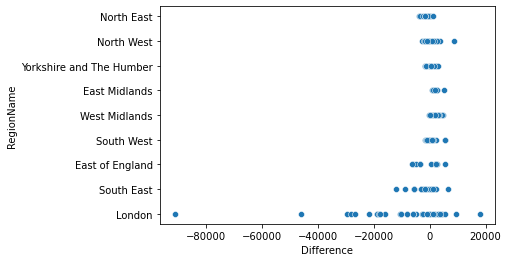

In [40]:
sns.scatterplot(x='Difference',y='RegionName', data=df_flat)

## CONCLUSION

The scatter plot shows the price difference in each region in the month of july 2017 and july 2018. Our objective is to
obtain the price change in that month for each year and there are price ups and downs for the each region. There is
a more price drop in London than other regions with the range of 20000 to 90000 approx of price drops. And London prices was
high upto 20000 in july 2017. And other region got more or less similar prices difference with not that much of a change in those Months.


## PART 4 : STATISTICAL ANALYSIS

In [63]:
df_change=df_flat[['RegionName','Area','Difference']]
def changes(row):
    if row.Difference>0:
        return 'Increase'
    elif row.Difference <0:
        return 'Decrease'
df_change=df_change.assign(Change=df_change.apply(changes,axis=1))  
df_change

,RegionName,Area,Difference,Change
0,North East,Hartlepool,-3891.02012,Decrease
1,North East,Middlesbrough,150.83825,Increase
2,North East,Redcar and Cleveland,-705.01266,Decrease
3,North East,Stockton-on-Tees,55.22466,Increase
4,North East,Darlington,-3362.06155,Decrease
...,...,...,...,...
146,East of England,Suffolk,2210.28110,Increase
147,South East,Surrey,-2971.83510,Decrease
148,West Midlands,Warwickshire,1793.77060,Increase
149,South East,West Sussex,-1711.65960,Decrease


## CROSS TABULATION

In [52]:
df_change = pd.crosstab(df_change.Change, [df_change.RegionName])
df_change

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


## Chi-square Test

Our objective is to find whether there is achange in price in each area with respective region or not with the use 
of Chi-square test.

Assuming the price change in different areas are independent of which then region the area begongs , Using Chi-square test
Now, this is our null hypothesis.

In [58]:
test_stat, p_value, dof, expected = stats.chi2_contingency(df_change, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))

There are 8 degrees of freedom
The chi-squared test statistic is 27.60
The p-value is 0.056 %


Given the p-value, we can reject the null hypothesis, with the table of chi-square distribution and we can conclude that
the both features are dependent and are highly correlated with each other.